In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Observo el set de datos
train = pd.read_csv('Escritorio/nlp-getting-started/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Elimino columnas innecesarias
tweets = train.drop(columns=['id','keyword','location'])
tweets.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# Veo si el dataframe tiene valores nulos
tweets.isnull().any()

text      False
target    False
dtype: bool

In [5]:
# Creo una columna adicional que almacena la longitud de los tweets
tweets['longitud']  = tweets['text'].str.len()
tweets.head()

,text,target,longitud
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [6]:
# Elimino la columna text y renombro la columna target
tweets.drop(columns='text', inplace = True)
tweets.rename(columns = {'target':'veracidad'}, inplace = True)
tweets.head()

,veracidad,longitud
0,1,69
1,1,38
2,1,133
3,1,65
4,1,88


In [7]:
tweets.size

15226

In [8]:
# Reemplazo los valores de la columna veracidad por otros mas descriptivos
tweets['veracidad'] = tweets['veracidad'].map({1: 'Verdadero', 0: 'Falso'})

In [9]:
# Veo que no se haya perdido ningun valor
tweets.size

15226

In [10]:
longitudes = tweets['longitud']
media = longitudes.mean()
media

101.03743596479706

In [11]:
longitudes.max()

157

In [12]:
longitudes.min()

7

In [13]:
longitudes_menores = tweets['longitud'] < media
longitudes_menores

0        True
1        True
2       False
3        True
4        True
        ...  
7608     True
7609    False
7610     True
7611    False
7612     True
Name: longitud, Length: 7613, dtype: bool

In [14]:
longitudes_mayores = longitudes > media
longitudes_mayores

0       False
1       False
2        True
3       False
4       False
        ...  
7608    False
7609     True
7610    False
7611     True
7612    False
Name: longitud, Length: 7613, dtype: bool

In [15]:
tweets[longitudes_menores]['veracidad'].value_counts()

Falso        2199
Verdadero    1273
Name: veracidad, dtype: int64

In [16]:
tweets[longitudes_menores]['veracidad'].value_counts(normalize=True).mul(100).round(1)

Falso        63.3
Verdadero    36.7
Name: veracidad, dtype: float64

In [17]:
tweets[longitudes_mayores]['veracidad'].value_counts()

Falso        2143
Verdadero    1998
Name: veracidad, dtype: int64

In [18]:
tweets[longitudes_mayores]['veracidad'].value_counts(normalize=True).mul(100).round(1)

Falso        51.8
Verdadero    48.2
Name: veracidad, dtype: float64

Podemos ver que en los tweets de una longitud mayor a la media, la veracidad está repartida casi igualitariamente. Mientras que en los tweets con una longitud menor a la media, hay una ligera tendencia ser un tweet falso.

Text(0.5, 0, 'Longitud del tweet (caracteres)')

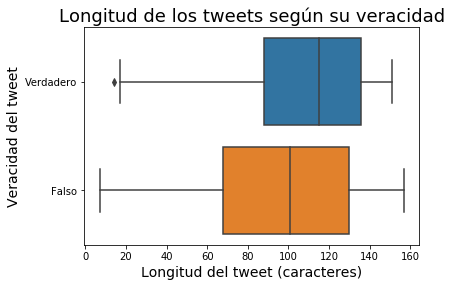

In [19]:
g = sns.boxplot(y="veracidad", x="longitud", data=tweets, orient='h')
g.set_title("Longitud de los tweets según su veracidad", fontsize=18)
g.set_ylabel("Veracidad del tweet", fontsize=14)
g.set_xlabel("Longitud del tweet (caracteres)", fontsize=14)

Interpretando el gráfico, se puede ver que hay una tendencia un poco mayor a ser 'verdadero' en tweets de mayor longitud que los de menor longitud, aunque en general podemos afirmar que no hay una fuerte relación entre la longitud del tweet y su veracidad.